<a href="https://colab.research.google.com/github/PerezTorresJhoyceR/IA_Sis420/blob/main/Laboratorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot
from google.colab import drive

# Montar Google Drive
drive.mount("/content/gdrive")

# Cargar datos con pandas
df = pd.read_csv('/content/gdrive/MyDrive/IA/ClassicHit.csv')

Mounted at /content/gdrive


Cantidad total de ejemplos: 15150
Theta (descenso por gradiente): [-9.38783968  0.1884731   3.27387237]
Error cuadrático medio (MSE): 7.9322
Coeficiente de determinación (R²): 0.4849
Volumen estimado (descenso por gradiente): -6.67 dB
Theta (ecuación de la normal): [-18.16027446   1.14931756  13.28416515]
Error cuadrático medio (MSE): 7.9327
Coeficiente de determinación (R²): 0.4849
Volumen estimado (ecuación de la normal): -6.67 dB


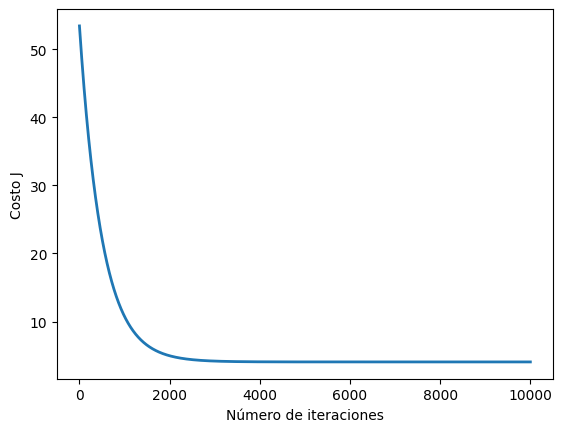

In [3]:
# Seleccionar columnas relevantes
X_full = df[['Danceability', 'Energy']].values
y_full = df['Loudness'].values
m = y_full.size
print("Cantidad total de ejemplos:", m)

# División manual 80% entrenamiento, 20% prueba
split_index = int(0.8 * m)
X_train = X_full[:split_index]
y_train = y_full[:split_index]
X_test = X_full[split_index:]
y_test = y_full[split_index:]

# Normalización con base en entrenamiento
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_train_norm, mu, sigma = featureNormalize(X_train)
X_test_norm = (X_test - mu) / sigma

# Añadir columna de unos
X_train_norm = np.concatenate([np.ones((X_train_norm.shape[0], 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((X_test_norm.shape[0], 1)), X_test_norm], axis=1)

# Función de costo
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

# Descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Parámetros iniciales
alpha = 0.001
num_iters = 10000
theta = np.zeros(3)

# Entrenar modelo
theta, J_history = gradientDescentMulti(X_train_norm, y_train, theta, alpha, num_iters)

# Graficar convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Evaluar en conjunto de prueba
y_pred = np.dot(X_test_norm, theta)
error = y_test - y_pred
mse = np.mean(np.square(error))
r2 = 1 - (np.sum(np.square(error)) / np.sum(np.square(y_test - np.mean(y_test))))

print("Theta (descenso por gradiente):", theta)
print("Error cuadrático medio (MSE): {:.4f}".format(mse))
print("Coeficiente de determinación (R²): {:.4f}".format(r2))

# Estimar volumen para canción ficticia
X_array = [1, 0.75, 0.80]
X_array[1:3] = (np.array(X_array[1:3]) - mu) / sigma
predicted_loudness = np.dot(X_array, theta)
print('Volumen estimado (descenso por gradiente): {:.2f} dB'.format(predicted_loudness))

# Comparación con ecuación de la normal (sin normalizar)
X_train_normal = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

def normalEqn(X, y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

theta_normal = normalEqn(X_train_normal, y_train)

# Evaluar en conjunto de prueba
X_test_normal = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
y_pred_normal = np.dot(X_test_normal, theta_normal)
error_normal = y_test - y_pred_normal
mse_normal = np.mean(np.square(error_normal))
r2_normal = 1 - (np.sum(np.square(error_normal)) / np.sum(np.square(y_test - np.mean(y_test))))

print("Theta (ecuación de la normal):", theta_normal)
print("Error cuadrático medio (MSE): {:.4f}".format(mse_normal))
print("Coeficiente de determinación (R²): {:.4f}".format(r2_normal))

# Estimar volumen para canción ficticia
X_array_normal = [1, 0.75, 0.80]
predicted_loudness_normal = np.dot(X_array_normal, theta_normal)
print('Volumen estimado (ecuación de la normal): {:.2f} dB'.format(predicted_loudness_normal))


El dataset “15,000 Music Tracks - 19 Genres (Spotify Data)” contiene 15,150 canciones clásicas de 3,083 artistas, recopiladas entre los años 1923 y 2023. Cada registro incluye variables numéricas extraídas de Spotify, como bailabilidad (Danceability), energía (Energy), tempo (Tempo), duración (Duration), tono (Key), modalidad (Mode), compás (Time_Signature), año de lanzamiento (Year) y volumen (Loudness). Estas características permiten aplicar regresión múltiple para modelar el volumen de una canción en función de sus propiedades acústicas y temporales.


